# Data Drift Detector

Data Drift Detector provides some quick methods to detect data drift. This may be commonly needed to identify if a live machine learning model's performance have dipped due to data drift in the production environment. These methods include calculating the distribution distances, plotting of graphs, and comparing the ML efficacy of the 2 datasets.

This notebook will demonstrate the usage of the data drift detector package.

Let's use the boston dataset for this example, and split it equally into 2 to simulate prior and post datasets.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from data_drift_detector import DataDriftDetector

In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# split the data set
split_ = int(len(df)/2)
df_prior = df.iloc[:split_]
df_post = df.iloc[split_:]

Initialize the detector

In [4]:
cat_columns = ['CHAS']
detector = DataDriftDetector(df_prior=df_prior,
                            df_post=df_post,
                            categorical_columns=cat_columns,
                            numeric_columns=[c for c in df.columns 
                                             if c not in cat_columns])

`.calculate_drift()` returns a sorted list of tuples containing the column name and the corresponding jensen shannon distance between the respective column in the prior and post dataframe. The higher the distance, the higher the difference between the 2 dataset's statistical properties for the column, signifying higher drift.

In [5]:
# calculate jensen shannon distance between each column of the 2 data sets
detector.calculate_drift()

{'categorical': [('CHAS', 0.027580547926347922)],
 'numerical': [('CRIM', 0.6486595353158059),
  ('TAX', 0.4816882947298939),
  ('RAD', 0.4735382149974217),
  ('NOX', 0.37874903296304485),
  ('PTRATIO', 0.30678038595574797),
  ('B', 0.30495225543748566),
  ('INDUS', 0.2879590513261556),
  ('target', 0.2064206126593292),
  ('DIS', 0.18710135001405784),
  ('LSTAT', 0.1384259348937012),
  ('RM', 0.1209385662639916),
  ('AGE', 0.07421296392405434),
  ('ZN', 0.07395191713106158)]}

Let's look at the difference by way of a plot.

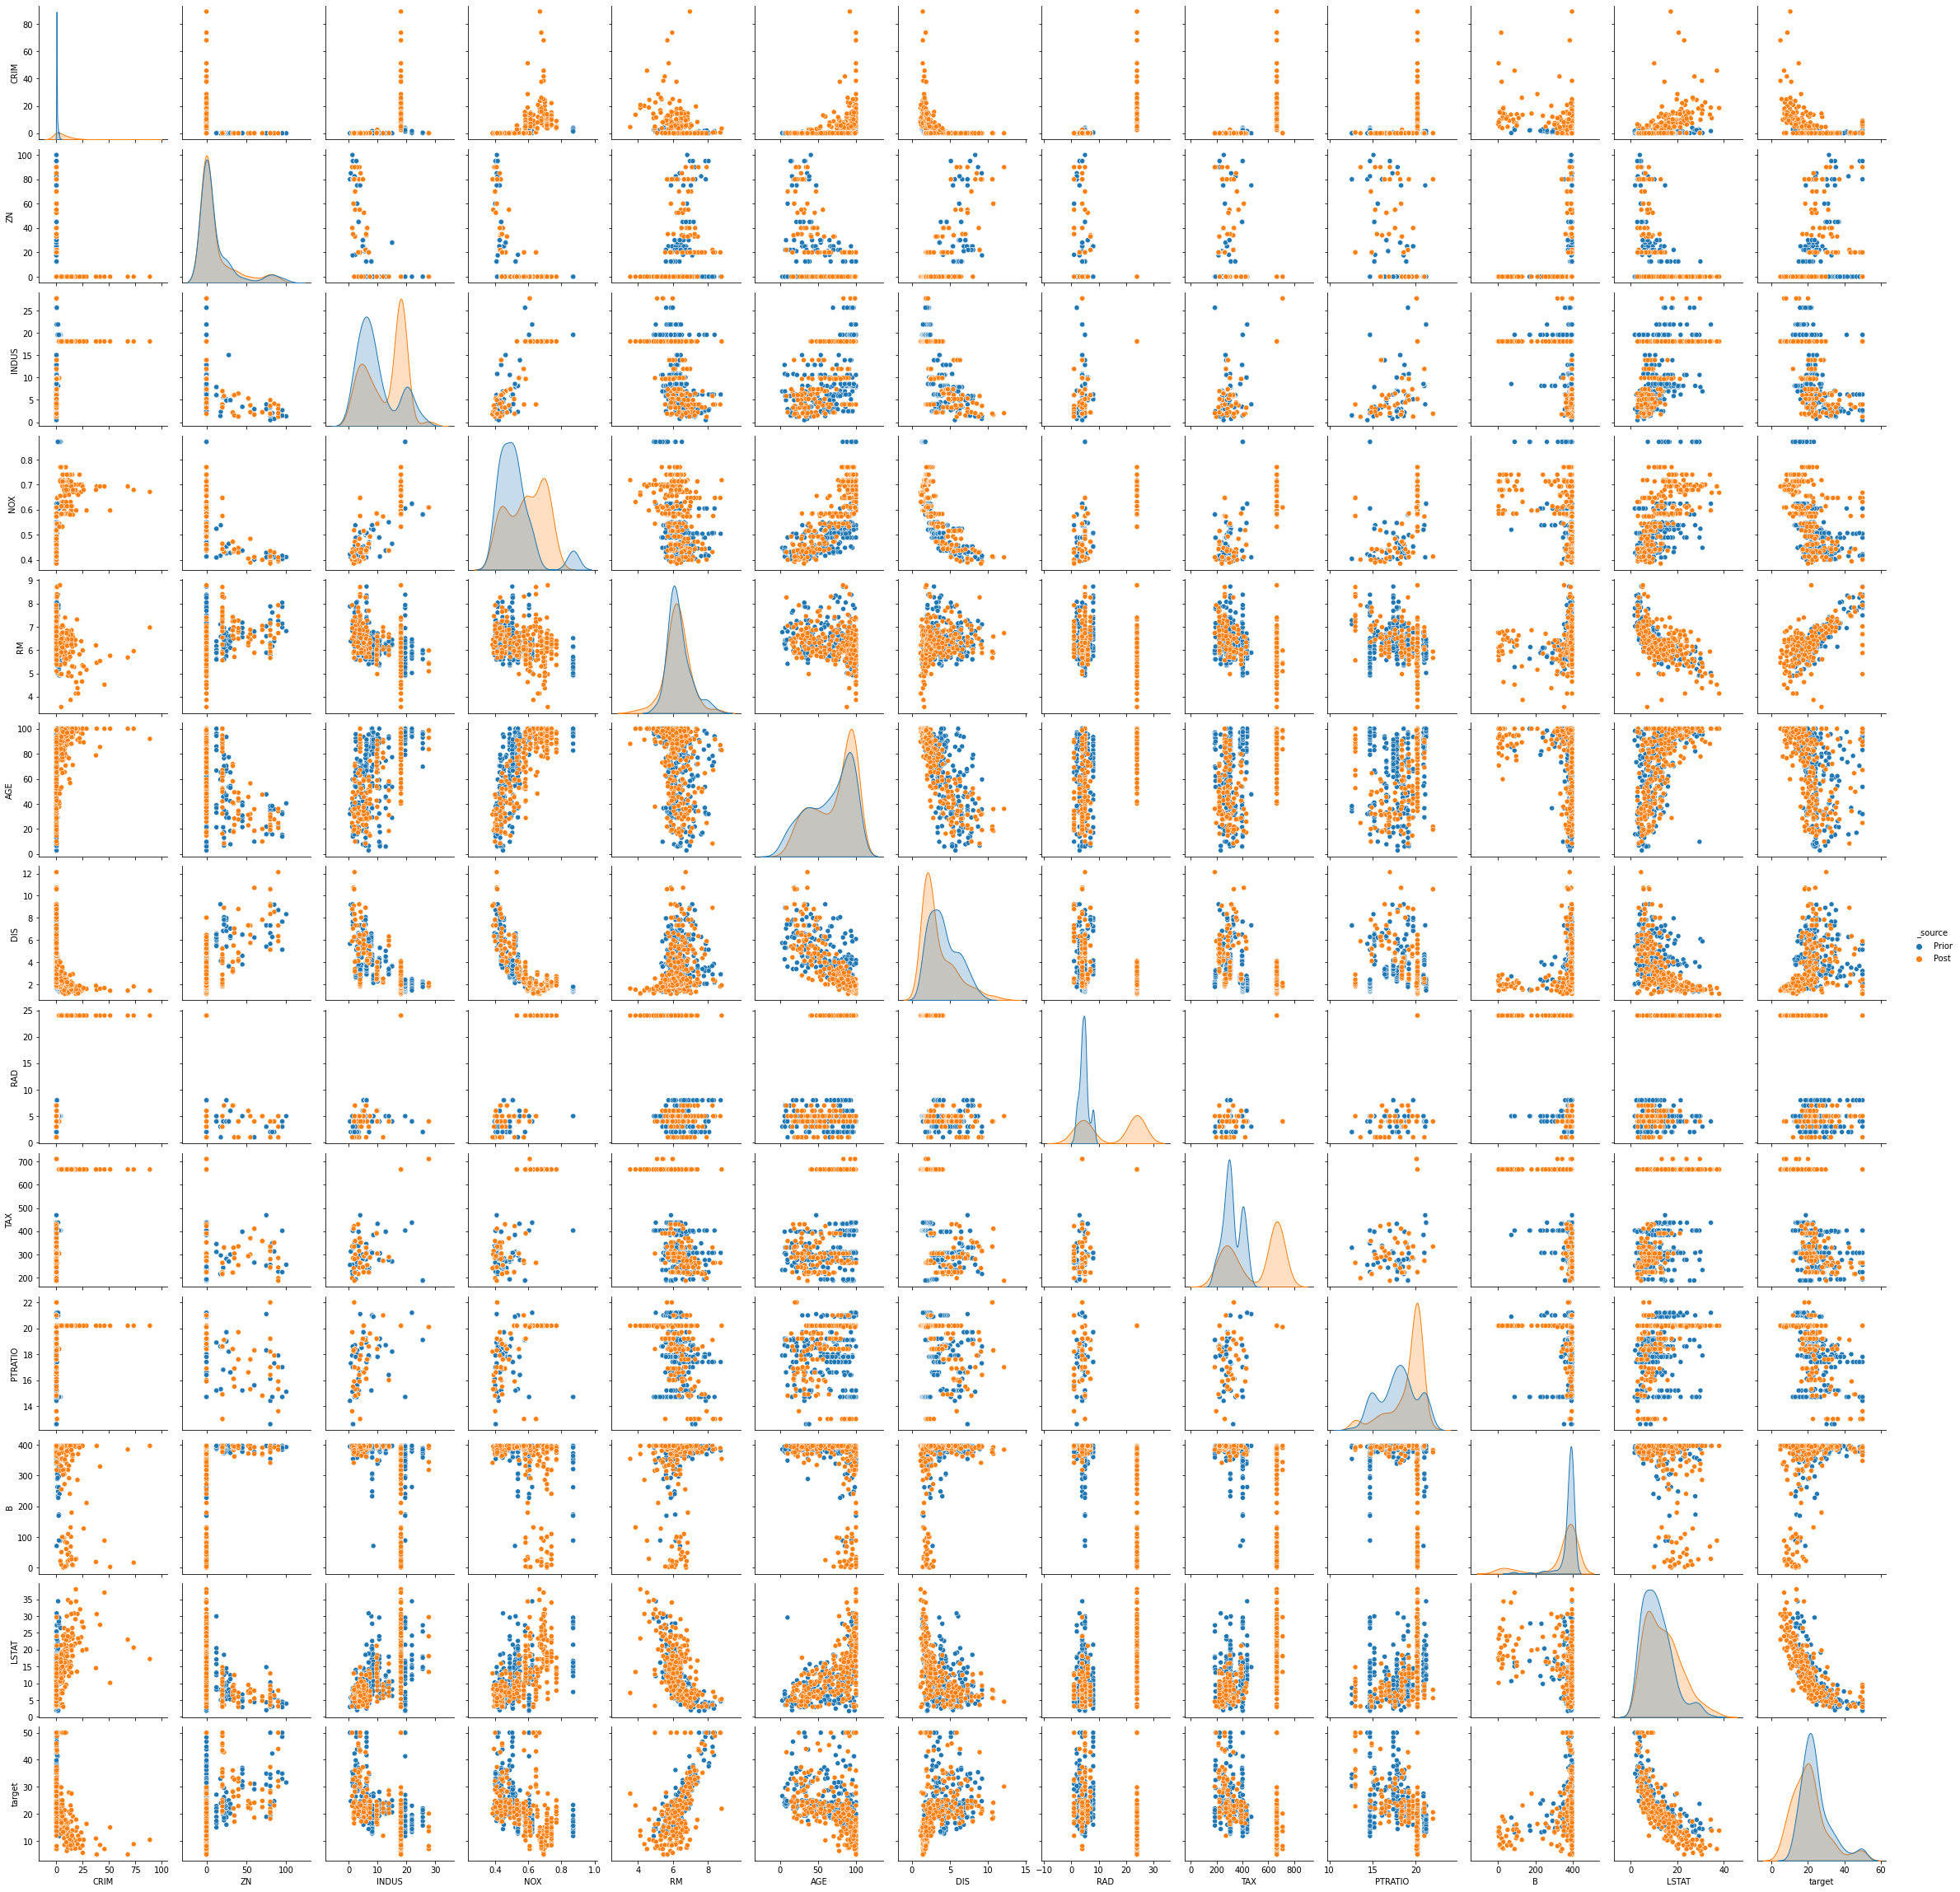

In [6]:
# plot numeric columns against each other in a pair grid
detector.plot_numeric_to_numeric()

We can see that the difference between `CRIM`, `TAX`, and `RAD` indeed look a little different.

We may also explore plots for categorical columns vs numerical columns.

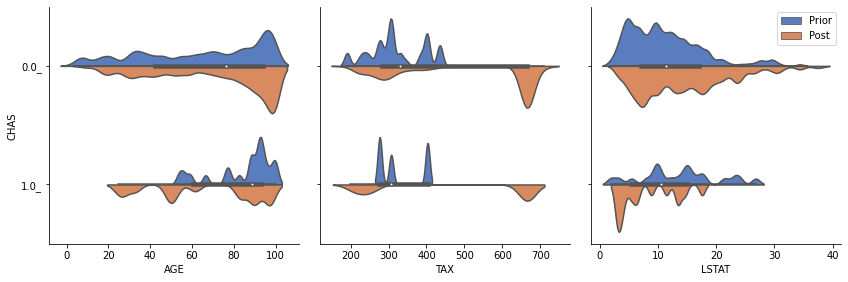

In [7]:
detector.plot_categorical_to_numeric(plot_numeric_columns = ["AGE", "TAX", "LSTAT"])

As well as categorical columns.

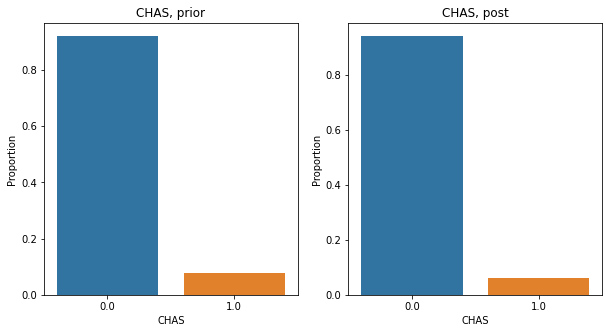

In [8]:
detector.plot_categorical()

Finally, you may compare the ML efficacy of the 2 datasets on a particular column

In [9]:
detector.compare_ml_efficacy(target_column='target')

,RMSE,MAE,R2
Prior,6.058802,4.101745,0.540378
Post,4.442486,2.682065,0.752896


The prior dataset performed noticeably worse (R2 of 0.69 vs 0.83) than the post data set, which may suggest that an existing model (if any) built with the prior dataset is not performing well on the post data set, and that it may improve from some re-training.